<a href="https://colab.research.google.com/github/ciaoCiao100/Prova1/blob/master/classificatoriDiasteroidi3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

!apt-get -qq install -y libfluidsynth1
!pip install matplotlib===3.5.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import random
import math
from sklearn.ensemble import VotingClassifier
from sklearn import datasets
from itertools import cycle
from sklearn import svm, datasets

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from google.colab import drive
from sklearn import metrics


In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
def recuperaPerformance(y_test, y_pred):
  cm = confusion_matrix(y_test, y_pred)
  precision=0
  recall=0
  f1=0
  accuracy=0
  specifity=0
  for c in range(4):
      tp = cm[c,c]
      fp = sum(cm[:,c]) - cm[c,c]
      fn = sum(cm[c,:]) - cm[c,c]
      tn = sum(np.delete(sum(cm)-cm[c,:],c))
      _precision = tp/(fp+tp)
      _recall = tp/(fn+tp)
      _f1 = (2*_precision*_recall)/(_precision+_recall)
      _accuracy = (tp+tn)/(tn+fp+fn+tp)
      _specifity = tn/(fp+tn)
      _precision = 0 if np.isnan(_precision) else _precision
      _recall = 0 if np.isnan(_recall) else _recall
      _f1 = 0 if np.isnan(_f1) else _f1
      _accuracy = 0 if np.isnan(_accuracy) else _accuracy
      _specifity = 0 if np.isnan(_specifity) else _specifity
      precision = precision+_precision
      recall = recall+_recall
      f1 = f1+_f1
      accuracy = accuracy+_accuracy
      specifity = specifity+_specifity

#print("for class {}: recall {}, specificity {}\
#precision {}, f1 {}".format(c,round(recall,4), round(specificity,4),round(precision,4),round(f1_score,4)))

  return precision/4, recall/4, f1/4, accuracy/4, specifity/4


In [ ]:
def plotPerformance(scores, titolo):
  print(scores)
  labels = ['Precision', 'Recall', 'F1-Score', 'Accuracy', 'Specificity']
  DT_value = scores[0]
  NB_value = scores[1]
  SVC_value = scores[2]
  x = np.arange(len(labels))
  width = 0.20
  fig, ax = plt.subplots()
  rectsDT = ax.bar(x - width, DT_value, width, label='DT',color='#7F7F7F')
  rectsNB = ax.bar(x, NB_value, width, label='NB', color='#FE9900')
  rectsSVC = ax.bar(x + width, SVC_value, width, label='SVC',color='#77933C')
  ax.set_ylabel('Misure %')
  ax.set_xticks(x, labels)
  ax.legend()
  ax.bar_label(rectsDT, padding=3, rotation=90)
  ax.bar_label(rectsNB, padding=3, rotation=90)
  ax.bar_label(rectsSVC, padding=3, rotation=90)
  fig.tight_layout()
  plt.legend(loc=(1.04,0))
  plt.title(titolo)
  plt.show()

In [ ]:
path = "/content/drive/MyDrive/classi/pha.csv"
df= pd.read_csv(path)
df


,Object,Epoch (TDB),a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),ref,class,Object.1
0,1566 Icarus,57800,1.078066,0.826854,22.825495,31.382966,88.010681,215.528772,0.1867,1.97,1.12,16.90,0.034507,100,APO*,1566 Icarus
1,1620 Geographos,57800,1.245304,0.335342,13.337482,276.893024,337.207958,104.155607,0.8277,1.66,1.39,15.60,0.030669,448,APO*,1620 Geographos
2,1862 Apollo,55249,1.470264,0.559922,6.352995,285.852564,35.736768,174.626213,0.6470,2.29,1.78,16.25,0.025795,263,APO*,1862 Apollo
3,1981 Midas,57800,1.776025,0.650141,39.832538,267.791993,356.903343,173.188556,0.6214,2.93,2.37,15.20,0.003551,118,APO*,1981 Midas
4,2101 Adonis,57800,1.874123,0.764602,1.326399,43.388048,349.694944,235.158622,0.4412,3.31,2.57,18.80,0.011645,33,APO*,2101 Adonis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,(2016 XH2),57728,1.662826,0.382487,0.874625,304.980506,221.156655,312.111572,1.0268,2.30,2.14,21.08,0.036365,3,AMO*,(2016 XH2)
1744,(2016 XW17),57730,2.706630,0.764459,11.433742,282.994922,267.501145,344.253089,0.6375,4.78,4.45,20.19,0.016630,5,APO*,(2016 XW17)
1745,(2016 XC18),57730,2.037870,0.667525,8.906649,279.721935,64.690270,19.063147,0.6775,3.40,2.91,21.86,0.007084,4,APO*,(2016 XC18)
1746,(2016 XJ18),57732,2.095193,0.654662,4.014503,145.429653,25.164523,340.766105,0.7235,3.47,3.03,21.91,0.044428,4,APO*,(2016 XJ18)


In [ ]:
df.dtypes

Object          object
Epoch (TDB)      int64
a (AU)         float64
e              float64
i (deg)        float64
w (deg)        float64
Node (deg)     float64
M (deg)        float64
q (AU)         float64
Q (AU)         float64
P (yr)         float64
H (mag)        float64
MOID (AU)      float64
ref              int64
class           object
Object.1        object
dtype: object

In [ ]:
df[df.select_dtypes(np.float64).columns] = df.select_dtypes(np.float64).astype(np.float32)
df.dtypes

Object          object
Epoch (TDB)      int64
a (AU)         float32
e              float32
i (deg)        float32
w (deg)        float32
Node (deg)     float32
M (deg)        float32
q (AU)         float32
Q (AU)         float32
P (yr)         float32
H (mag)        float32
MOID (AU)      float32
ref              int64
class           object
Object.1        object
dtype: object

In [ ]:
df['class'].replace(to_replace=['APO*','ATE*','AMO*','APO','IEO*','ATE'], value=[0, 1, 2,3,4,5], inplace=True)
df.rename(columns = {'class':'Class'}, inplace = True)
df

,Object,Epoch (TDB),a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),ref,Class,Object.1
0,1566 Icarus,57800,1.078066,0.826854,22.825495,31.382965,88.010681,215.528778,0.1867,1.97,1.12,16.900000,0.034507,100,0,1566 Icarus
1,1620 Geographos,57800,1.245304,0.335342,13.337481,276.893036,337.207947,104.155609,0.8277,1.66,1.39,15.600000,0.030669,448,0,1620 Geographos
2,1862 Apollo,55249,1.470264,0.559922,6.352995,285.852570,35.736767,174.626221,0.6470,2.29,1.78,16.250000,0.025795,263,0,1862 Apollo
3,1981 Midas,57800,1.776025,0.650141,39.832539,267.791992,356.903351,173.188553,0.6214,2.93,2.37,15.200000,0.003551,118,0,1981 Midas
4,2101 Adonis,57800,1.874123,0.764602,1.326399,43.388046,349.694946,235.158615,0.4412,3.31,2.57,18.799999,0.011645,33,0,2101 Adonis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,(2016 XH2),57728,1.662826,0.382487,0.874625,304.980499,221.156662,312.111572,1.0268,2.30,2.14,21.080000,0.036365,3,2,(2016 XH2)
1744,(2016 XW17),57730,2.706630,0.764459,11.433743,282.994934,267.501160,344.253082,0.6375,4.78,4.45,20.190001,0.016630,5,0,(2016 XW17)
1745,(2016 XC18),57730,2.037869,0.667525,8.906650,279.721924,64.690269,19.063147,0.6775,3.40,2.91,21.860001,0.007084,4,0,(2016 XC18)
1746,(2016 XJ18),57732,2.095193,0.654662,4.014503,145.429657,25.164524,340.766113,0.7235,3.47,3.03,21.910000,0.044428,4,0,(2016 XJ18)


In [ ]:
for col in df:
  print(col + " " + str(len(df[col].unique())))


Object 1748
Epoch (TDB) 133
a (AU) 1748
e 1747
i (deg) 1748
w (deg) 1748
Node (deg) 1748
M (deg) 1748
q (AU) 1527
Q (AU) 413
P (yr) 437
H (mag) 109
MOID (AU) 1717
ref 178
Class 6
Object.1 1748


In [ ]:
  df.drop(columns=['Object','Object.1'], inplace = True)
  df.dtypes

Epoch (TDB)      int64
a (AU)         float32
e              float32
i (deg)        float32
w (deg)        float32
Node (deg)     float32
M (deg)        float32
q (AU)         float32
Q (AU)         float32
P (yr)         float32
H (mag)        float32
MOID (AU)      float32
ref              int64
Class            int64
dtype: object

In [ ]:
df.insert(len(df.columns)-1, 'Class', df.pop('Class'))



In [ ]:
df

,Epoch (TDB),a (AU),e,i (deg),w (deg),Node (deg),M (deg),q (AU),Q (AU),P (yr),H (mag),MOID (AU),ref,Class
0,57800,1.078066,0.826854,22.825495,31.382965,88.010681,215.528778,0.1867,1.97,1.12,16.900000,0.034507,100,0
1,57800,1.245304,0.335342,13.337481,276.893036,337.207947,104.155609,0.8277,1.66,1.39,15.600000,0.030669,448,0
2,55249,1.470264,0.559922,6.352995,285.852570,35.736767,174.626221,0.6470,2.29,1.78,16.250000,0.025795,263,0
3,57800,1.776025,0.650141,39.832539,267.791992,356.903351,173.188553,0.6214,2.93,2.37,15.200000,0.003551,118,0
4,57800,1.874123,0.764602,1.326399,43.388046,349.694946,235.158615,0.4412,3.31,2.57,18.799999,0.011645,33,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1743,57728,1.662826,0.382487,0.874625,304.980499,221.156662,312.111572,1.0268,2.30,2.14,21.080000,0.036365,3,2
1744,57730,2.706630,0.764459,11.433743,282.994934,267.501160,344.253082,0.6375,4.78,4.45,20.190001,0.016630,5,0
1745,57730,2.037869,0.667525,8.906650,279.721924,64.690269,19.063147,0.6775,3.40,2.91,21.860001,0.007084,4,0
1746,57732,2.095193,0.654662,4.014503,145.429657,25.164524,340.766113,0.7235,3.47,3.03,21.910000,0.044428,4,0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in double_scalars
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in long_scalars
  del sys.path[0]


[[99.0, 100.0, 99.0, 100.0, 100.0], [59.0, 71.0, 63.0, 95.0, 97.0], [20.0, 25.0, 22.0, 91.0, 75.0]]


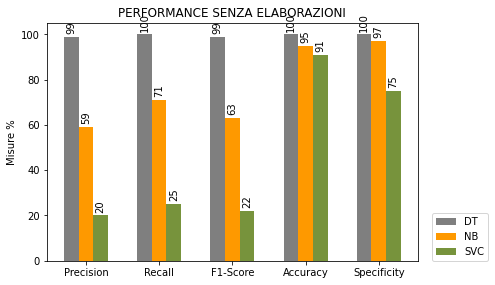

In [ ]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)
_y_test=y_test.to_numpy()
decisionTree = DecisionTreeClassifier()
naiveBayes = GaussianNB()
svc =  LinearSVC()
#randomForest = RandomForestClassifier(n_estimators=10)

classifiers=[decisionTree, naiveBayes,svc]
#classifiers=[decisionTree, naiveBayes]
scores = []
for classificatore in classifiers:
  classificatore.fit(X_train, y_train)
  y_pred = classificatore.predict(X_test)
  precision, recall, f1, accuracy, specifity = recuperaPerformance(_y_test,y_pred)
  score = []
  score.append(round(precision,2)*100)
  score.append(round(recall,2)*100)
  score.append(round(f1,2)*100)
  score.append(round(accuracy,2)*100)
  score.append(round(specifity,2)*100)
  scores.append(score)
plotPerformance(scores, 'PERFORMANCE SENZA ELABORAZIONI')
